In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
from textblob import TextBlob
import math
import re

In [4]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [5]:
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [6]:
SA = np.zeros(55600)
for i in range(55600):
    if df['Text'][i] != df['Text'][i]:
        continue
    else:
        SA[i] = analize_sentiment(df['Text'][i])
        #print(i)

In [11]:
df['SA'] = SA
df.groupby(['years','month','days']).count()

OBJECTID  TweetID  UserID  ReplyToTweet  ReplyToUser    X  \
years  month days                                                              
2012.0 9.0   1.0        251      251     251            43           49  251   
             2.0        234      234     234            36           45  234   
             3.0        236      236     236            41           51  236   
             4.0        240      240     240            49           56  240   
             5.0        352      352     352            76           92  352   
             6.0        366      366     366            75           88  366   
             7.0        367      367     367            56           72  367   
             8.0        396      396     396            74           91  396   
             9.0        390      390     390            73           91  390   
             10.0       351      351     351            67           90  351   
             11.0       355      355     355            55           79  355   
             12.0       400      400     400            80          104  400   
             13.0       404      404     404            86           98  404   
             14.0       397      397     397            67           91  397   
             15.0       414      414     414            56           74  414   
             16.0       385      385     385            79           97  385   
             17.0       365      365     365            87          101  365   
             18.0       380      380     380            90          105  380   
             19.0       400      400     400            88          103  400   
             20.0       410      410     410            93          108  410   
             21.0       402      402     402            82          101  402   
             22.0       449      449     449            83          111  449   
             23.0       478      478     478            91          111  478   
             24.0       410      410     410            84          106  410   
             25.0       383      383     383            76           97  383   
             26.0       421      421     421            96          109  421   
             27.0       426      426     426            85          104  426   
             28.0       402      402     402            59           71  402   
             29.0       484      484     484           104          119  484   
             30.0       485      485     485            87          103  485   
...                     ...      ...     ...           ...          ...  ...   
       11.0  16.0       559      559     559           122          144  559   
             17.0       556      556     556           113          134  556   
             18.0       574      574     574           104          130  574   
             19.0       510      510     510           121          145  510   
             20.0       520      520     520           108          128  520   
             21.0       564      564     564           113          141  564   
             22.0       568      568     568           121          135  568   
             23.0       429      429     429            84          102  429   
             24.0       487      487     487            95          109  487   
             25.0       520      520     520           116          135  520   
             26.0       490      490     490           105          131  490   
             27.0       493      493     493           106          129  493   
             28.0       545      545     545           114          137  545   
             29.0       519      519     519           101          133  519   
             30.0       507      507     507           116          142  507   
       12.0  1.0        537      537     537           105          123  537   
             2.0        523      523     523           106          119  523   
             3.0   

In [12]:
SA_pos_portion = np.zeros(106)
SA_neg_portion = np.zeros(106)

In [13]:
index = 0
for i in range(9, 13):
    for j in range(32):
        temp = df[((df['month'] == i) & (df['days'] == j) ) ]
        row, column = temp.shape
        if(row ==0):
            continue
        else:
            SA_pos_portion[index] = sum(temp['SA'] > 0)*100/len(temp['Text'])
            SA_neg_portion[index] = sum(temp['SA'] < 0)*100/len(temp['Text']) 
            index = index +1 
        

In [14]:
import matplotlib.pyplot as plt


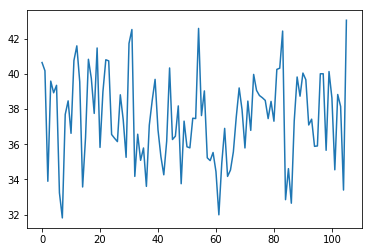

In [15]:
plt.plot(range(106), SA_pos_portion, '-')
plt.show()

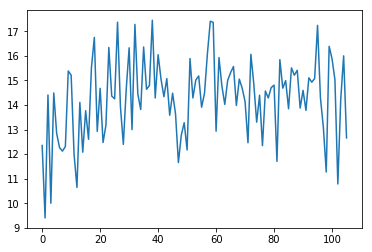

In [16]:
plt.plot(range(106), SA_neg_portion, '-')
plt.show()

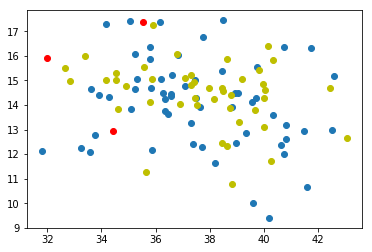

In [24]:
plt.plot(SA_pos_portion[0:59], SA_neg_portion[0:59], 'o')
plt.plot(SA_pos_portion[59:62], SA_neg_portion[59:62], 'ro')
plt.plot(SA_pos_portion[62:106], SA_neg_portion[62:106], 'yo')

#plt.plot(SA_pos_portion[58], SA_neg_portion[58], 'ro')
plt.show()

In [18]:
SA_pos_portion[0:59]

array([ 40.6374502 ,  40.17094017,  33.89830508,  39.58333333,
        38.92045455,  39.3442623 ,  33.24250681,  31.81818182,
        37.69230769,  38.46153846,  36.61971831,  40.75      ,
        41.58415842,  39.5465995 ,  33.57487923,  36.36363636,
        40.82191781,  39.73684211,  37.75      ,  41.46341463,
        35.82089552,  38.97550111,  40.79497908,  40.73170732,
        36.5535248 ,  36.34204276,  36.15023474,  38.80597015,
        37.39669421,  35.25773196,  41.72335601,  42.51101322,
        34.17475728,  36.56884876,  35.0877193 ,  35.78732106,
        33.60824742,  37.08333333,  38.4787472 ,  39.68253968,
        36.82432432,  35.3046595 ,  34.26573427,  36.18090452,
        40.32921811,  36.26865672,  36.45621181,  38.17567568,
        33.75912409,  37.31092437,  35.85526316,  35.79454254,
        37.47680891,  37.45874587,  42.57425743,  37.62811127,
        39.02728351,  35.2297593 ,  35.07148865])

In [33]:
data_group = df.groupby(['years','month','days']).count()
data_group.head()

OBJECTID  TweetID  UserID  ReplyToTweet  ReplyToUser    X  \
years  month days                                                              
2012.0 9.0   1.0        251      251     251            43           49  251   
             2.0        234      234     234            36           45  234   
             3.0        236      236     236            41           51  236   
             4.0        240      240     240            49           56  240   
             5.0        352      352     352            76           92  352   

                     Y  time  StatusCount  Text   SA  
years  month days                                     
2012.0 9.0   1.0   251   251          251   251  251  
             2.0   234   234          234   234  234  
             3.0   236   236          236   236  236  
             4.0   240   240          240   240  240  
             5.0   352   352          352   352  352

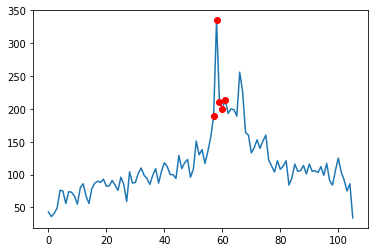

5.0

In [42]:
plt.plot(range(106), data_group['ReplyToTweet'], '-')
plt.plot(range(57,62), data_group['ReplyToTweet'][57:62], 'ro')
plt.show()
df['days'][57]

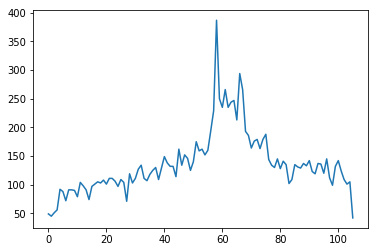

In [35]:
plt.plot(range(106), data_group['ReplyToUser'], '-')
plt.show()

In [50]:
data_group.head(57)

OBJECTID  TweetID  UserID  ReplyToTweet  ReplyToUser    X  \
years  month days                                                              
2012.0 9.0   1.0        251      251     251            43           49  251   
             2.0        234      234     234            36           45  234   
             3.0        236      236     236            41           51  236   
             4.0        240      240     240            49           56  240   
             5.0        352      352     352            76           92  352   
             6.0        366      366     366            75           88  366   
             7.0        367      367     367            56           72  367   
             8.0        396      396     396            74           91  396   
             9.0        390      390     390            73           91  390   
             10.0       351      351     351            67           90  351   
             11.0       355      355     355            55           79  355   
             12.0       400      400     400            80          104  400   
             13.0       404      404     404            86           98  404   
             14.0       397      397     397            67           91  397   
             15.0       414      414     414            56           74  414   
             16.0       385      385     385            79           97  385   
             17.0       365      365     365            87          101  365   
             18.0       380      380     380            90          105  380   
             19.0       400      400     400            88          103  400   
             20.0       410      410     410            93          108  410   
             21.0       402      402     402            82          101  402   
             22.0       449      449     449            83          111  449   
             23.0       478      478     478            91          111  478   
             24.0       410      410     410            84          106  410   
             25.0       383      383     383            76           97  383   
             26.0       421      421     421            96          109  421   
             27.0       426      426     426            85          104  426   
             28.0       402      402     402            59           71  402   
             29.0       484      484     484           104          119  484   
             30.0       485      485     485            87          103  485   
       10.0  1.0        441      441     441            88          111  441   
             2.0        454      454     454           102          127  454   
             3.0        515      515     515           110          134  515   
             4.0        443      443     443            99          111  443   
             5.0        456      456     456            94          107  456   
             6.0        489      489     489            85          118  489   
             7.0        485      485     485            99          125  485   
             8.0        480      480     480           109          130  480   
             9.0        447      447     447            87          109  447   
             10.0       504      504     504           105          129  504   
             11.0       592      592     592           118          149  592   
             12.0       558      558     558           112          138  558   
             13.0       572      572     572           100          132  572   
             14.0       597      597     597           100          132  597   
             15.0       486      486     486            94          114  486   
             16.0       670      670     670           129          162  670   
             17.0       491      491     491           109          134  491   
             18.0       592      592     592           118          152  592   
             19.0  

In [35]:
SA_pos_portion[59]

35.53162853297443

In [36]:
SA_pos_portion[61]

31.994645247657296

In [41]:
SA_pos_portion[58]

35.071488645920944

In [27]:
a = df.groupby(['years','month','days']).count()

In [30]:
# Anormly dete

251